In [33]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Create mapping for folder names to labels

root_dir = '.'
label_map = {chr(i + ord('a')): i for i in range(26)}
del label_map['j']
del label_map['z']

In [ ]:
# Turn each image into 28x28 grayscale pixel values

data = []
for label_letter in sorted(label_map.keys()):
    folder_path = os.path.join(root_dir, label_letter)
    if not os.path.isdir(folder_path):
        continue

    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith('.jpeg'):
            file_path = os.path.join(folder_path, file_name)

            try:
                img = Image.open(file_path).convert('L')
                pixel_array = np.array(img).astype(np.float32)
                if pixel_array.max() > 0:
                    pixel_array = (pixel_array / pixel_array.max()) * 255
                pixel_array[pixel_array == 0] = 145
                processed_img = Image.fromarray(pixel_array.astype(np.uint8))
                resized_img = processed_img.resize((28, 28))
                pixel_values = np.array(resized_img).flatten()
                row = np.insert(pixel_values, 0, label_map[label_letter])
                data.append(row)

            except Exception as e:
                print(f"Error processing {file_path}: {e}")


In [36]:
# Convert array into a DataFrame

columns = ['label'] + [f'pixel{i}' for i in range(1, 785)]
df = pd.DataFrame(data, columns=columns)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,145,145,145,145,145,145,145,145,145,...,80,34,120,148,145,145,145,145,145,145
1,0,145,145,145,145,145,145,145,145,145,...,89,36,130,147,145,145,145,145,145,145
2,0,145,145,145,145,145,145,145,145,145,...,105,50,119,148,145,145,145,145,145,145
3,0,145,145,145,145,145,145,145,145,145,...,124,56,118,148,145,145,145,145,145,145
4,0,145,145,145,145,145,145,145,145,145,...,89,50,118,148,145,145,145,145,145,145


In [37]:
# Check dataset size and dimensions

label_counts_df = df['label'].value_counts().sort_index()
for label, count in label_counts_df.items():
    letter = chr(label + ord('a'))
    print(f"Letter '{letter}' (Label {label}): {count} images")

print(df.shape)


Letter 'a' (Label 0): 70 images
Letter 'b' (Label 1): 70 images
Letter 'c' (Label 2): 70 images
Letter 'd' (Label 3): 70 images
Letter 'e' (Label 4): 70 images
Letter 'f' (Label 5): 70 images
Letter 'g' (Label 6): 70 images
Letter 'h' (Label 7): 70 images
Letter 'i' (Label 8): 70 images
Letter 'k' (Label 10): 70 images
Letter 'l' (Label 11): 70 images
Letter 'm' (Label 12): 70 images
Letter 'n' (Label 13): 70 images
Letter 'o' (Label 14): 70 images
Letter 'p' (Label 15): 70 images
Letter 'q' (Label 16): 70 images
Letter 'r' (Label 17): 70 images
Letter 's' (Label 18): 70 images
Letter 't' (Label 19): 65 images
Letter 'u' (Label 20): 70 images
Letter 'v' (Label 21): 70 images
Letter 'w' (Label 22): 70 images
Letter 'x' (Label 23): 70 images
Letter 'y' (Label 24): 70 images
(1675, 785)


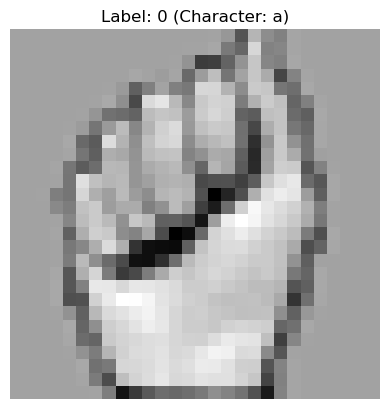

In [38]:
# Display a sample image

first_image = df.iloc[0, 1:].values.reshape(28, 28)
label = df.iloc[0, 0]

plt.imshow(first_image, cmap='gray')
plt.title(f'Label: {label} (Character: {chr(label + ord("a"))})')
plt.axis('off')
plt.show()

In [39]:
# Export dataset to CSV

df.to_csv('asl_dataset.csv', index=False)